In [1]:
#importing Libraries

import cv2 
import os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import BatchNormalization,Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
data_path = 'data'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

labels_dict = dict(zip(categories,labels))

print(categories)
print(labels)
print(labels_dict)

['man', 'woman']
[0, 1]
{'man': 0, 'woman': 1}


In [3]:
img_size = 100
data = []
target = []

for category in categories:
    folder_path = os.path.join(data_path,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        
        try:
            grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(grey,(img_size,img_size))
            data.append(resized)
            target.append(labels_dict[category])
            
        except Exception as e:
            
            print("Exception:",e)

In [4]:
target[114]

0

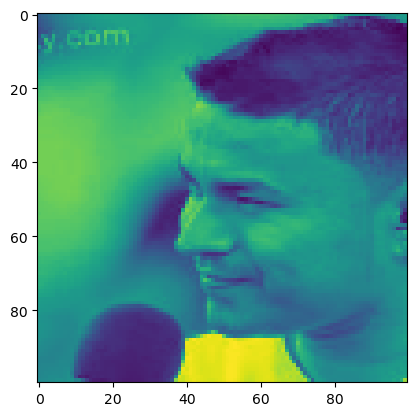

In [5]:
import matplotlib.pyplot as plt

plt.imshow(data[114])
plt.show()

In [4]:
#normalizing data

import numpy as np

data = np.array(data)/255.0

data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

from keras.utils import np_utils

new_target = np_utils.to_categorical(target) #convering string to categorical
print('2',new_target)

2 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [5]:
print(data.shape)

(8280, 100, 100, 1)


In [8]:
np.save('data',data)
np.save('target',new_target)